In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

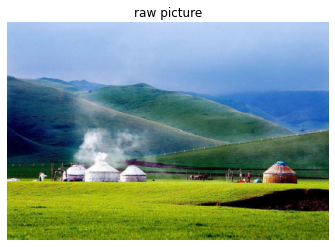

In [6]:
#raw image
img=Image.open('raw.png')
img=np.array(img)
plt.imshow(img)
plt.title('raw picture')
plt.axis('off')
plt.show()

In [4]:
def imgSVD(img,rate,gray=False):
    cimg=np.empty(img.shape,dtype=int)
    if gray==True:
        U,Sigma,V_T=np.linalg.svd(img)
        k=int(np.ceil(rate*len(Sigma)))
        cimg=U[:,:k]@np.diag(Sigma[:k])@V_T[:,:k]
    else:
        for channel in range(img.shape[2]):
            U,Sigma,V_T=np.linalg.svd(img[:,:,channel])
            k=int(np.ceil(rate*len(Sigma)))
            cimg[:,:,channel]=U[:,:k]@np.diag(Sigma[:k])@V_T[:k,:]
    return cimg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


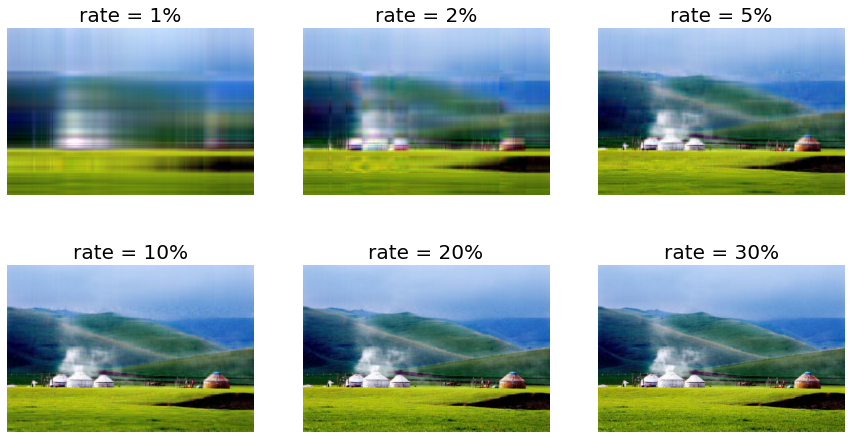

In [8]:
f,axes=plt.subplots(2,3,figsize=(15,8))
axes=axes.reshape(-1)
rate_list=[0.01,0.02,0.05,0.1,0.2,0.3]
for i in range(6):
    ax=axes[i]
    rate=rate_list[i]
    cimg=imgSVD(img,rate)
    ax.imshow(cimg)
    ax.set_title('rate = %d%%' % int(100*rate),fontsize=20)
    ax.set_axis_off()
plt.show()